# Project 2

# Used Vehicle Price Prediction

#### Angie Paola Chacon Pinzon: 201012536
#### Jahir Stevens Rodriguez Riveros: 201819361
#### Juan Andres Cabal Jaramillo: 200620778
#### David Tavera Sánchez: 201016123

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
data = pd.read_csv('datasets/dataTrain_carListings.zip')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
Price      500000 non-null int64
Year       500000 non-null int64
Mileage    500000 non-null int64
State      500000 non-null object
Make       500000 non-null object
Model      500000 non-null object
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

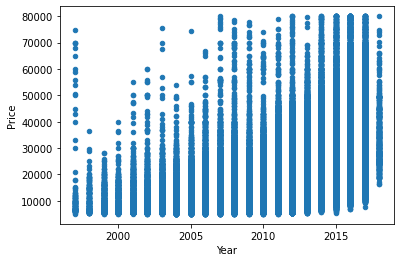

In [6]:
data.plot(kind='scatter', y='Price', x='Year')

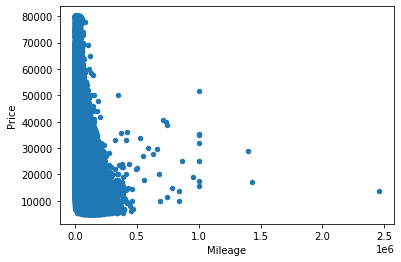

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [8]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


### Boosting

In [17]:
#%matplotlib inline
#import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime

In [10]:
def now():
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)


In [11]:
data['ModelT']=data['Model'].str[:4]

data.head()

,Price,Year,Mileage,State,Make,Model,ModelT
0,21490,2014,31909,MD,Nissan,MuranoAWD,Mura
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe,Cama
2,20925,2016,24633,SC,Hyundai,Santa,Sant
3,14500,2012,84026,OK,Jeep,Grand,Gran
4,32488,2013,22816,TN,Jeep,Wrangler,Wran


In [12]:
data['ModelT'].unique()


array(['Mura', 'Cama', 'Sant', 'Gran', 'Wran', 'F-15', 'Expl', 'Sona',
       'Sore', 'M-Cl', 'Jour', 'Supe', 'Sier', 'Silv', 'Camr', 'Odys',
       'Path', 'Acad', 'Esca', 'Expr', 'Edge', 'Pass', 'Flex', 'CTS',
       'S60T', 'Comp', '5', 'Impr', 'Rogu', 'Civi', 'Cruz', 'Acco',
       'Priu', 'Pilo', 'Town', 'Lega', 'Rega', 'Yuko', '2500', 'IS',
       'Taco', 'X3xD', 'Rang', 'Focu', '200L', 'CR-V', 'Caye', 'Mali',
       'Cher', 'Tund', 'Impa', 'Q7qu', 'Tigu', 'Subu', 'F-35', '350Z',
       'XC60', 'Elan', '300T', 'Libe', 'Must', 'RX', 'Fusi', 'Arma',
       'Ram', 'Jett', 'Alti', 'GS', 'Coro', 'Dura', 'Navi', 'TT2d',
       'Sedo', 'Sent', 'LX', '3004', 'Encl', 'Taho', '3003', 'Maxi', '3',
       'E-Cl', 'Coop', 'Soul', 'RAV4', 'Aval', 'Opti', 'G37', 'Expe',
       'Equi', 'Patr', 'Sequ', 'Taur', 'tC2d', 'Char', '1500', 'Corv',
       'Sien', 'Terr', 'Rove', 'FJ', 'XC90', '6', 'Chal', 'ES', 'TL4d',
       '4Run', 'F-25', 'Dako', 'ISIS', 'CTS4', 'WRXP', 'CX-9', 'Fort',
       'Fron',

In [13]:
states_xgb = pd.get_dummies(data['State'])
models_xgb = pd.get_dummies(data['ModelT'])
df_xgb = pd.concat([data[['Price', 'Year', 'Mileage']], states_xgb, models_xgb], axis = 1)
#df = pd.concat([data[['Price']], makes], axis = 1)
df_xgb.shape

(500000, 292)

In [14]:
df_xgb.head()

,Price,Year,Mileage,AK,AL,AR,AZ,CA,CO,CT,...,XC90,XF4d,XJ4d,XK2d,Xter,Yari,Yuko,tC2d,xB5d,xD5d
0,21490,2014,31909,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21250,2016,25741,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20925,2016,24633,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14500,2012,84026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32488,2013,22816,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y = df_xgb['Price']
X = df_xgb.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


- Learning rate:  0<𝜂≤1. Fracción de los componentes de un árbol que serán usadas para la estimación del siguiente árbol. Es usado para mejorar la generalización del árbol. Cuando más pequeño es el parámetro es mejor la generalización que hace. Cuándo el valor es 1, significa que se usan todos los componentes del árbol actual para crear el siguiente árbol
- gamma: Ganancia mínima que debe superar una partición para ser incluida en el árbol. Es un número entre [0,inf] y a medida que es más grande el árbol final es más simple.
- colsample_bytree: Fracción de las columnas que serán tomadas para la construcción de cada árbol. tiene un valor entre 0 y 1 siendo 1:"tomar todas las columnas"

In [27]:
from sklearn.externals import joblib

# list of values to try for max_features
learning_range =sorted(np.arange(0.2, 1.2, 0.2),reverse=True)
gamma_range = sorted(range(5, 10),reverse=True)
colsample_range =sorted(np.arange(0.2, 1.2, 0.2),reverse=True)

# list to store the average Accuracy for each value of max_features
best_rmse=9999999
best_clf=XGBRegressor()
best_params=[]
for lr in learning_range:
    for g in gamma_range:
        for cs in colsample_range:
            now()
            clf = XGBRegressor(eta=lr, gamma=g,colsample_bytree=cs)
            clf.fit(X_train,y_train)
            y_pred=clf.predict(X_test)
            rmse=np.sqrt(metrics.mean_squared_error(y_pred,y_test))
            print ("RMSE:",rmse,"params: ",best_params)
            if rmse<best_rmse:
                best_rmse=rmse
                best_clf=clf
                best_params=[lr,g,cs]
                print ("B_RMSE:",best_rmse,"B_params: ",best_params)

Current Time = 13:49:12
Current Time = 13:55:06
RMSE: 4144.303652068261 params:  [1.0, 9, 1.0000000000000002]
Current Time = 13:55:06
Current Time = 14:00:19
Current Time = 14:00:19
Current Time = 14:05:09
Current Time = 14:05:09
Current Time = 14:09:21
Current Time = 14:09:21
Current Time = 14:13:15
Current Time = 14:13:15
Current Time = 14:17:00
Current Time = 14:17:01
Current Time = 14:19:53
Current Time = 14:19:54
Current Time = 14:22:11
Current Time = 14:22:11
Current Time = 14:24:03
Current Time = 14:24:04
Current Time = 14:29:52
Current Time = 14:29:52
Current Time = 14:35:13
Current Time = 14:35:13
Current Time = 14:40:02
Current Time = 14:40:02
Current Time = 14:44:27
Current Time = 14:44:27
Current Time = 14:48:17
Current Time = 14:48:18
Current Time = 14:51:39
Current Time = 14:51:39
Current Time = 14:54:45
Current Time = 14:54:46
Current Time = 14:57:09
Current Time = 14:57:09
Current Time = 14:58:55
Current Time = 14:58:55
Current Time = 15:04:38
Current Time = 15:04:38


MemoryError: 

In [28]:
print ("RMSE:",best_rmse,"params: ",best_params)
joblib.dump(clf, 'model_deployment/modeloXGB.pkl', compress=3)

RMSE: 4144.303652068261 params:  [1.0, 9, 1.0000000000000002]


['model_deployment/modeloXGB.pkl']

In [26]:
learning_range =sorted(np.arange(0.1, 1.1, 0.1),reverse=True)
learning_range

[1.0,
 0.9,
 0.8,
 0.7000000000000001,
 0.6,
 0.5,
 0.4,
 0.30000000000000004,
 0.2,
 0.1]

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine


#### On the local machine

In [ ]:
from model_deployment.p2model_deployment import predict_price
year=2020
mileage=550
state='AL'
make ='Audi'
model='1'


In [ ]:
 predict_price(year,mileage,state,make,model)

In [ ]:
from flask import Flask
from flask_restplus import Api, Resource, fields
from sklearn.externals import joblib
from model_deployment.p2model_deployment import predict_price

app = Flask(__name__)

api = Api(
    app, 
    version='1.0', 
    title='Price Prediction API G7',
    description='Angie Paola Chacon Pinzon: 201012536\nJahir Stevens Rodriguez Riveros: 201819361\nJuan Andres Cabal Jaramillo: 200620778\nDavid Tavera Sánchez: 201016123')

ns = api.namespace('predict', 
     description='Price Regressor')
   
parser = api.parser()

parser.add_argument(
    'Year', 
    type=int, 
    required=True, 
    help='Year of the car to be analyzed', 
    location='args')

parser.add_argument(
    'Mileage', 
    type=int, 
    required=True, 
    help='Mileage of the car to be analyzed', 
    location='args')

parser.add_argument(
    'State', 
    type=str, 
    required=True, 
    help='State of the car to be analyzed', 
    location='args')

parser.add_argument(
    'Make', 
    type=str, 
    required=True, 
    help='Maker of the car to be analyzed', 
    location='args')

parser.add_argument(
    'Model', 
    type=str, 
    required=True, 
    help='Model of the car to be analyzed', 
    location='args')


resource_fields = api.model('Resource', {
    'price': fields.String,
})

@ns.route('/')
class PriceApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        
        return {
         "price": predict_price(args['Year'],args['Mileage'],args['State'],args['Make'],args['Model'])
        }, 200
    

In [ ]:
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)

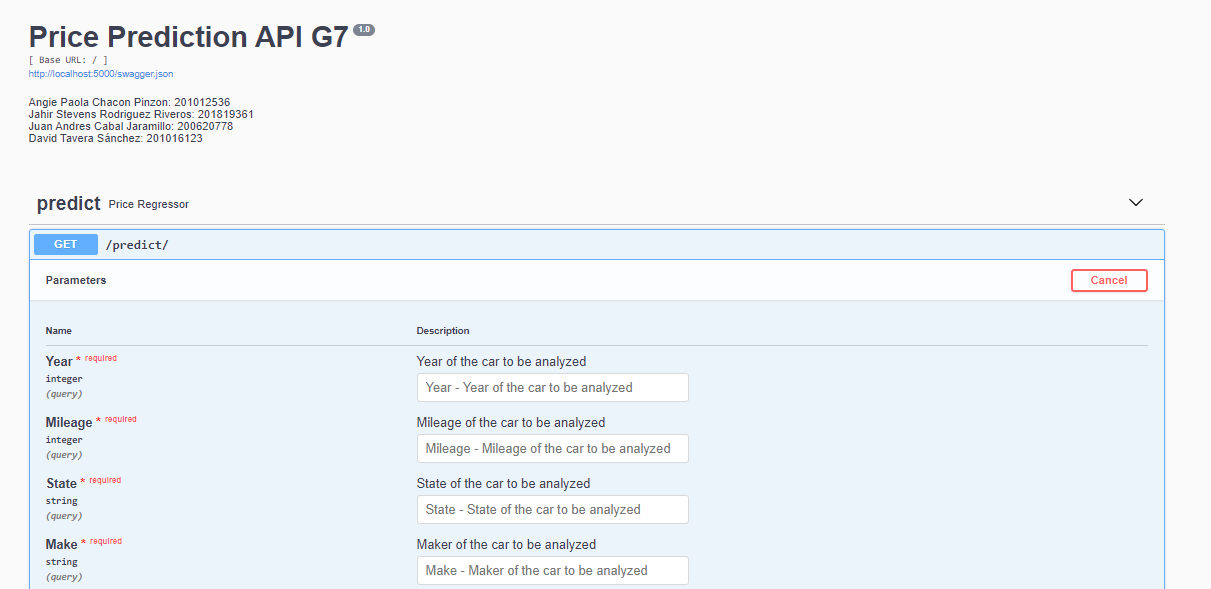